In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.models import model_from_yaml, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import save_model
from keras.models import load_model
from tensorflow.keras.utils import  to_categorical
from keras.preprocessing.image import img_to_array, array_to_img


# transfer learning -- InceptionV3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input

# other
from pprint import pprint
from joblib import dump, load
import os
import glob

In [2]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [4]:
train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [5]:
subset_0 = train[train['label'] == 0].sample(frac = 0.1, replace = False, random_state = 25)
subset_1 = train[train['label'] == 1].sample(frac = 0.1, replace = False, random_state = 25)
subset_2 = train[train['label'] == 2].sample(frac = 0.1, replace = False, random_state = 25)
subset_3 = train[train['label'] == 3].sample(frac = 0.1, replace = False, random_state = 25)
subset_4 = train[train['label'] == 4].sample(frac = 0.1, replace = False, random_state = 25)
subset_5 = train[train['label'] == 5].sample(frac = 0.1, replace = False, random_state = 25)
subset_6 = train[train['label'] == 6].sample(frac = 0.1, replace = False, random_state = 25)
subset_7 = train[train['label'] == 7].sample(frac = 0.1, replace = False, random_state = 25)
subset_8 = train[train['label'] == 8].sample(frac = 0.1, replace = False, random_state = 25)
subset_9 = train[train['label'] == 9].sample(frac = 0.1, replace = False, random_state = 25)

In [6]:
sub = [subset_0, subset_1, subset_2, subset_3, subset_4, subset_5, subset_6, subset_7, subset_8, subset_9]
subset_6000 = pd.concat(sub)

In [7]:
# shuffle the subset
from sklearn.utils import shuffle
subset = shuffle(subset_6000)

subset['label'].value_counts()

7    600
3    600
6    600
2    600
9    600
5    600
1    600
8    600
4    600
0    600
Name: label, dtype: int64

In [12]:
subset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
19908,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56343,4,0,0,0,0,0,1,0,0,0,...,0,0,0,37,90,56,0,0,0,0
59934,0,0,0,0,0,0,0,0,0,41,...,70,24,0,0,0,0,0,0,0,0
31937,3,0,0,0,0,0,0,0,0,12,...,197,198,202,76,0,0,0,0,0,0
38468,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# X_train = train.drop(columns = 'label')
# y_train = train[['label']]

# print(X_train.shape, y_train.shape)

In [ ]:
# X_test = test.drop(columns = 'label')
# y_test = test[['label']]

# print(X_test.shape, y_test.shape)

In [14]:
X = subset.drop(columns = 'label')
y = subset[['label']]

print(X.shape, y.shape)

(6000, 784) (6000, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4800, 784) (1200, 784) (4800, 1) (1200, 1)


In [16]:
# convert to float because we do not want the values to just be 0 or 1 - normalize the dataset and then divide by 255

X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [17]:
# for InceptionV3, we need the size to be at least 75 x 75 x 3

# first change number of channels to 3
X_train_inceptionV3 = np.dstack([X_train] * 3)
X_test_inceptionV3 = np.dstack([X_test] * 3)

print(X_train_inceptionV3.shape, X_test_inceptionV3.shape)

(4800, 784, 3) (1200, 784, 3)


In [18]:
# next reshape images to 28 x 28

X_train_inceptionV3 = X_train_inceptionV3.reshape((-1, 28, 28, 3))
X_test_inceptionV3 = X_test_inceptionV3.reshape((-1, 28, 28, 3))

print(X_train_inceptionV3.shape, X_test_inceptionV3.shape)

(4800, 28, 28, 3) (1200, 28, 28, 3)


In [19]:
# now we must resize to 75 x 75 x 3

X_train_inceptionV3 = np.asarray([img_to_array(array_to_img(img_xtr, scale=False).resize((75,75))) for img_xtr in X_train_inceptionV3])
X_test_inceptionV3 = np.asarray([img_to_array(array_to_img(img_xte, scale=False).resize((75,75))) for img_xte in X_test_inceptionV3])

print(X_train_inceptionV3.shape, X_test_inceptionV3.shape)

# yay! we have the right sizes :)

(4800, 75, 75, 3) (1200, 75, 75, 3)


In [20]:
# one hot encoding
y_train_inceptionV3 = to_categorical(y_train, num_classes = 10)
y_test_inceptionV3 = to_categorical(y_test, num_classes = 10)

print(y_train_inceptionV3.shape, y_test_inceptionV3.shape)

(4800, 10) (1200, 10)


In [21]:
# InceptionV3

# we have to preprocess the data
X_train_inceptionV3_pp = preprocess_input(X_train_inceptionV3)
X_test_inceptionV3_pp = preprocess_input(X_test_inceptionV3)

print(X_train_inceptionV3_pp.shape, X_test_inceptionV3_pp.shape)

(4800, 75, 75, 3) (1200, 75, 75, 3)


In [27]:
# load base model

incV3_base = InceptionResNetV2(include_top = False, weights = 'imagenet', input_shape = (75, 75, 3))
incV3_base.summary()

219062272/219055592 [==============================] - 54s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 37, 37, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 37, 37, 32)   0           batch_normalization_95[0][0]     
____________

In [28]:
# need to continue to add some layers -- see Keras documentation
x = incV3_base.output

# add Global Average Pooling as a Flatten layer (also used in Keras documentation)
x = GlobalAveragePooling2D()(x)

# add a Dense layer (fully-connected layer)
x = Dense(units = 1024, activation = 'relu')(x)

# add final Dense layer with units = # classes
predictions = Dense(units = 10, activation = 'softmax')(x)

In [29]:
# build final model

model = Model(inputs = incV3_base.input, outputs = predictions)

In [30]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers -- straight from Keras.io documentation
for layer in incV3_base.layers:
    layer.trainable = False

In [32]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#keras.utils.plot_model(model, "Updated InceptionV3.png")

In [34]:
# fit the model
hist = model.fit(X_train_inceptionV3_pp, y_train_inceptionV3, batch_size = 128, epochs = 50)

Epoch 1/50
4800/4800 [==============================] - 40s 8ms/step - loss: 2.2057 - accuracy: 0.2138
Epoch 2/50
4800/4800 [==============================] - 43s 9ms/step - loss: 2.1450 - accuracy: 0.2571
Epoch 3/50
4800/4800 [==============================] - 43s 9ms/step - loss: 2.0500 - accuracy: 0.2688
Epoch 4/50
4800/4800 [==============================] - 41s 9ms/step - loss: 1.9691 - accuracy: 0.3038
Epoch 5/50
4800/4800 [==============================] - 43s 9ms/step - loss: 1.9398 - accuracy: 0.3167
Epoch 6/50
4800/4800 [==============================] - 41s 9ms/step - loss: 1.8914 - accuracy: 0.3269
Epoch 7/50
4800/4800 [==============================] - 41s 9ms/step - loss: 1.8656 - accuracy: 0.3292
Epoch 8/50
4800/4800 [==============================] - 43s 9ms/step - loss: 1.8115 - accuracy: 0.3565
Epoch 9/50
4800/4800 [==============================] - 41s 9ms/step - loss: 1.7702 - accuracy: 0.3679
Epoch 10/50
4800/4800 [==============================] - 42s 9ms/step - l

In [62]:
# save model to disk
model.save('InceptionV3_ResNetV2_0530')

# keras.models.load_models("path")

In [36]:
# evaluate model
scores = model.evaluate(X_test_inceptionV3_pp, y_test_inceptionV3)

# prediction classes
preds = model.predict(X_test_inceptionV3_pp)

1200/1200 [==============================] - 15s 13ms/step


In [37]:
print(scores)

[2.6011084365844725, 0.09916666895151138]


In [38]:
print(preds[:1])

[[0.08948813 0.02045544 0.08884477 0.28678828 0.08196039 0.23497295
  0.02100581 0.1047454  0.03883969 0.03289906]]


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = hist.history
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_acc']
epochs = range(0, 50)

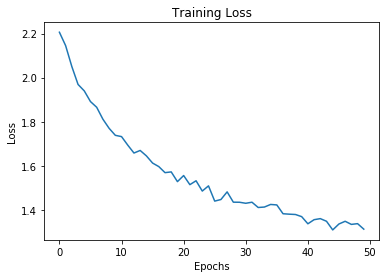

In [60]:
plt.figure()
plt.plot(epochs, loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

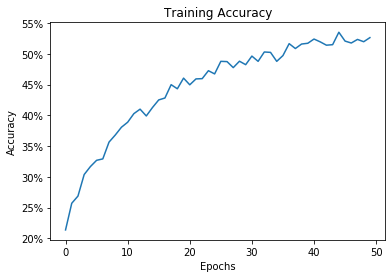

In [61]:
plt.figure()
plt.plot(epochs, acc_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.show()